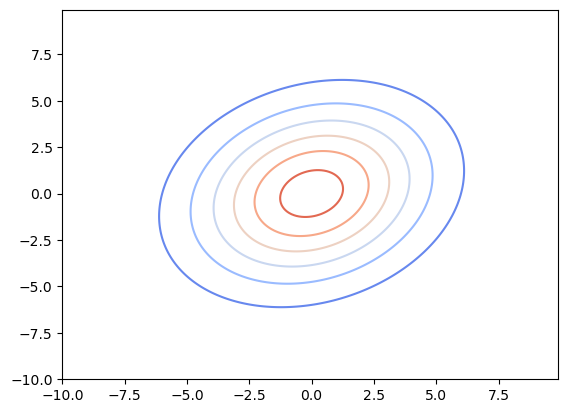

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = multivariate_normal([0, 0], [[10.0, 2.], [2., 10.0]])
data = np.dstack((x, y))
z = rv.pdf(data)
plt.contour(x, y, z, cmap='coolwarm')
plt.show()

In [ ]:
# # Importing the necessary modules
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal
 
 
# plt.style.use('seaborn-dark')
# plt.rcParams['figure.figsize']=14,6
# fig = plt.figure()
 
# # Initializing the random seed
# random_seed=1000
 
# # List containing the variance
# # covariance values
# cov_val = [-0.8]
 
# # Setting mean of the distributino
# # to be at (0,0)
# mean = np.array([0,0])
 
# # Storing density function values for
# # further analysis
# pdf_list = []
 
# # Iterating over different covariance values
# for idx, val in enumerate(cov_val):
     
#     # Initializing the covariance matrix
#     cov = np.array([[1, val], [val, 1]])
     
#     # Generating a Gaussian bivariate distribution
#     # with given mean and covariance matrix
#     distr = multivariate_normal(cov = cov, mean = mean,
#                                 seed = random_seed)
     
#     # Generating a meshgrid complacent with
#     # the 3-sigma boundary
#     mean_1, mean_2 = mean[0], mean[1]
#     sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
#     x = np.linspace(-10*sigma_1, 10*sigma_1, num=100)
#     y = np.linspace(-10*sigma_2, 10*sigma_2, num=100)
#     X, Y = np.meshgrid(x,y)
     
#     # Generating the density function
#     # for each point in the meshgrid
#     pdf = np.zeros(X.shape)
#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
#     # Plotting the density function values
#     # key = 131+idx
#     # ax = fig.add_subplot(key, projection = '3d')
#     # ax.plot_surface(X, Y, pdf, cmap = 'viridis')
#     # plt.xlabel("x1")
#     # plt.ylabel("x2")
#     # plt.title(f'Covariance between x1 and x2 = {val}')
#     # pdf_list.append(pdf)
#     # ax.axes.zaxis.set_ticks([])

#     plt.imshow(pdf)
#     plt.show()

#     plt.imshow(np.log(pdf))
#     plt.show()


# plt.tight_layout()
# plt.show()
 
# # Plotting contour plots
# # for idx, val in enumerate(pdf_list):
# #     plt.subplot(1,3,idx+1)
# #     plt.contourf(X, Y, val, cmap='viridis')
# #     plt.xlabel("x1")
# #     plt.ylabel("x2")
# #     plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
# # plt.tight_layout()
# # plt.show()

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def main():
    x0, y0 = 0.3, 0.7
    amp, a, b, c = 1, 2, 3, 4
    true_params = [amp, x0, y0, a, b, c]
    xy, zobs = generate_example_data(10, true_params)
    x, y = xy

    i = zobs.argmax()
    guess = [1, x[i], y[i], 1, 1, 1]
    pred_params, uncert_cov = opt.curve_fit(gauss2d, xy, zobs, p0=guess)

    zpred = gauss2d(xy, *pred_params)
    print('True parameters: ', true_params)
    print('Predicted params:', pred_params)
    print('Residual, RMS(obs - pred):', np.sqrt(np.mean((zobs - zpred)**2)))

    plot(xy, zobs, pred_params)
    plt.show()

def gauss2d(xy, amp, x0, y0, a, b, c):
    x, y = xy
    inner = a * (x - x0)**2
    inner += 2 * b * (x - x0)**2 * (y - y0)**2
    inner += c * (y - y0)**2
    return amp * np.exp(-inner)

def generate_example_data(num, params):
    np.random.seed(1977) # For consistency
    xy = np.random.random((2, num))

    zobs = gauss2d(xy, *params)
    return xy, zobs

def plot(xy, zobs, pred_params):
    x, y = xy
    yi, xi = np.mgrid[:1:30j, -.2:1.2:30j]
    xyi = np.vstack([xi.ravel(), yi.ravel()])

    zpred = gauss2d(xyi, *pred_params)
    zpred.shape = xi.shape

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=zobs, s=200, vmin=zpred.min(), vmax=zpred.max())
    im = ax.imshow(zpred, extent=[xi.min(), xi.max(), yi.max(), yi.min()],
                   aspect='auto')
    fig.colorbar(im)
    ax.invert_yaxis()
    return fig

main()